In [1]:
 # importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the csv files into dataframe.
train_df = pd.read_csv(r'C:\Users\Arathi\Downloads\train_v9rqX0R.csv')

test_df = pd.read_csv(r'C:\Users\Arathi\Downloads\test_AbJTz2l.csv')


In [3]:
# descriptive data analysis of train data
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_df.shape

(8523, 12)

In [5]:
train_df.index

RangeIndex(start=0, stop=8523, step=1)

In [6]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### preprocessing the train dataset

In [9]:
# check for null values
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train_df.isna().sum() / train_df.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
# here more than 10% missing values present.so drop that 2 columns and  that 2 id columns also droped.
train_df= train_df.drop(['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier'],axis=1)


In [12]:
train_df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052


#### Encoding

In [13]:
train_df.dtypes

Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
# label encoding
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
train_df['Item_Fat_Content'] = Label_encoder.fit_transform(train_df['Item_Fat_Content'])
train_df['Item_Type'] = Label_encoder.fit_transform(train_df['Item_Type'])
train_df['Outlet_Location_Type'] = Label_encoder.fit_transform(train_df['Outlet_Location_Type'])

train_df['Outlet_Type'] = Label_encoder.fit_transform(train_df['Outlet_Type'])



In [15]:
train_df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,0.016047,4,249.8092,1999,0,1,3735.1380
1,2,0.019278,14,48.2692,2009,2,2,443.4228
2,1,0.016760,10,141.6180,1999,0,1,2097.2700
3,2,0.000000,6,182.0950,1998,2,0,732.3800
4,1,0.000000,9,53.8614,1987,2,1,994.7052


<AxesSubplot:>

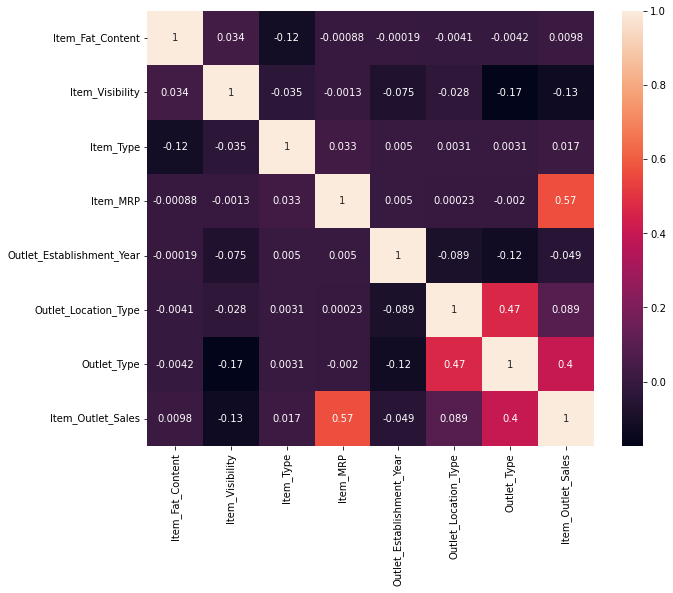

In [16]:
# correlation matrix   , heatmap
corrmatrix =train_df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, annot=True)

In [17]:
train_df['Item_Outlet_Sales']=np.log(1+train_df['Item_Outlet_Sales'])

In [18]:
# descriptive data analysis of test data
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [19]:
test_df.shape

(5681, 11)

In [20]:
train_df.index

RangeIndex(start=0, stop=8523, step=1)

In [21]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [22]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#### preprocessing the test dataset

In [24]:
# check for null values
test_df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [25]:
test_df.isna().sum() / test_df.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [26]:
# here more than 10% missing values present.so drop that 2 columns and  that 2 id columns also droped.
test_df= test_df.drop(['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier'],axis=1)


In [27]:
test_df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.007565,Snack Foods,107.8622,1999,Tier 1,Supermarket Type1
1,reg,0.038428,Dairy,87.3198,2007,Tier 2,Supermarket Type1
2,Low Fat,0.099575,Others,241.7538,1998,Tier 3,Grocery Store
3,Low Fat,0.015388,Snack Foods,155.0340,2007,Tier 2,Supermarket Type1
4,Regular,0.118599,Dairy,234.2300,1985,Tier 3,Supermarket Type3


#### Encoding

In [28]:
test_df.dtypes

Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [29]:
# label encoding
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
test_df['Item_Fat_Content'] = Label_encoder.fit_transform(test_df['Item_Fat_Content'])
test_df['Item_Type'] = Label_encoder.fit_transform(test_df['Item_Type'])
test_df['Outlet_Type'] = Label_encoder.fit_transform(test_df['Outlet_Type'])
test_df['Outlet_Location_Type'] = Label_encoder.fit_transform(test_df['Outlet_Location_Type'])


In [30]:
test_df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,1,0.007565,13,107.8622,1999,0,1
1,4,0.038428,4,87.3198,2007,1,1
2,1,0.099575,11,241.7538,1998,2,0
3,1,0.015388,13,155.0340,2007,1,1
4,2,0.118599,4,234.2300,1985,2,3


In [31]:
test_df1 = test_df.drop(['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type'],axis=1)

In [32]:
test_df1.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.007565,107.8622,1999
1,0.038428,87.3198,2007
2,0.099575,241.7538,1998
3,0.015388,155.0340,2007
4,0.118599,234.2300,1985


In [33]:
# import minmax scalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))# range 


In [34]:
test_df1 = min_max_scaler.fit_transform(test_df1)


In [35]:
type(test_df1)

numpy.ndarray

In [36]:
test_df.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [37]:
test_df1= pd.DataFrame(test_df1,columns=['Item_Visibility','Item_MRP','Outlet_Establishment_Year'])
test_df1.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.023374,0.323413,0.583333
1,0.118737,0.235849,0.916667
2,0.307674,0.894140,0.541667
3,0.047548,0.524488,0.916667
4,0.366458,0.862069,0.000000


In [38]:
test_df1.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000
mean,0.202955,0.464766,0.534538
std,0.158364,0.263468,0.348844
min,0.000000,0.000000,0.000000
25%,0.083572,0.266080,0.083333
50%,0.167330,0.466437,0.583333
75%,0.288788,0.656597,0.791667
max,1.000000,1.000000,1.000000


In [39]:
test_df.drop(['Item_Visibility','Item_MRP','Outlet_Establishment_Year'],axis=1, inplace=True)


In [40]:
test_df = pd.concat([test_df,test_df1],axis=1)

In [41]:
test_df.head()

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,13,0,1,0.023374,0.323413,0.583333
1,4,4,1,1,0.118737,0.235849,0.916667
2,1,11,2,0,0.307674,0.894140,0.541667
3,1,13,1,1,0.047548,0.524488,0.916667
4,2,4,2,3,0.366458,0.862069,0.000000


In [42]:
# splitting  our  train data into train and test

In [43]:
x = train_df.drop('Item_Outlet_Sales', axis=1)
y = train_df['Item_Outlet_Sales']

In [44]:
# importing library

from sklearn.model_selection import train_test_split
# train-70
# test-30

In [45]:
 # splitting the data into training and testing set

x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                     test_size=0.30,
                                                     random_state=42)

In [46]:
x_train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
1921,2,0.147904,6,116.6466,1998,2,0
655,1,0.014301,9,103.0332,1997,0,1
2229,2,0.054221,1,129.1310,1985,2,3
2537,1,0.118342,13,222.6088,2002,1,1
3528,2,0.092150,5,184.8266,1987,2,1


In [47]:
x_test.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
7503,1,0.026300,5,79.4302,1987,2,1
2957,1,0.071136,8,42.7086,1997,0,1
7031,2,0.041313,3,42.0454,1999,0,1
1084,2,0.044767,14,173.7054,1985,2,3
856,2,0.012456,10,197.5110,2004,1,1


In [48]:
y_train.head()

1921    4.777834
655     7.115906
2229    8.504022
2537    7.490345
3528    8.262032
Name: Item_Outlet_Sales, dtype: float64

In [49]:
y_test.head()

7503    7.463974
2957    5.880166
7031    5.936239
1084    8.662069
856     7.765540
Name: Item_Outlet_Sales, dtype: float64

In [50]:
x.describe()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,1.369354,0.066132,7.226681,140.992782,1997.831867,1.112871,1.201220
std,0.644810,0.051598,4.209990,62.275067,8.371760,0.812757,0.796459
min,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000
25%,1.000000,0.026989,4.000000,93.826500,1987.000000,0.000000,1.000000
50%,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000
75%,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,1.000000
max,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,3.000000


In [51]:
x.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,1,0.016047,4,249.8092,1999,0,1
1,2,0.019278,14,48.2692,2009,2,2
2,1,0.016760,10,141.6180,1999,0,1
3,2,0.000000,6,182.0950,1998,2,0
4,1,0.000000,9,53.8614,1987,2,1


In [52]:
x1 = x.drop(['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type'],axis=1)

In [53]:
x1

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.016047,249.8092,1999
1,0.019278,48.2692,2009
2,0.016760,141.6180,1999
3,0.000000,182.0950,1998
4,0.000000,53.8614,1987
...,...,...,...
8518,0.056783,214.5218,1987
8519,0.046982,108.1570,2002
8520,0.035186,85.1224,2004
8521,0.145221,103.1332,2009


In [54]:
# import minmax scalling
from sklearn.preprocessing import MinMaxScaler

In [55]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))# range 
x1 = min_max_scaler.fit_transform(x1)

In [56]:
type(x1)

numpy.ndarray

In [57]:
train_df.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [58]:
x1= pd.DataFrame(x1,columns=['Item_Visibility','Item_MRP','Outlet_Establishment_Year'])

In [59]:
x1.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.048866,0.927507,0.583333
1,0.058705,0.072068,1.000000
2,0.051037,0.468288,0.583333
3,0.000000,0.640093,0.541667
4,0.000000,0.095805,0.083333


In [60]:
x1.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,8523.000000,8523.000000,8523.000000
mean,0.201382,0.465635,0.534661
std,0.157123,0.264327,0.348823
min,0.000000,0.000000,0.000000
25%,0.082187,0.265437,0.083333
50%,0.164228,0.474209,0.583333
75%,0.288026,0.655156,0.791667
max,1.000000,1.000000,1.000000


In [61]:
x.drop(['Item_Visibility','Item_MRP','Outlet_Establishment_Year'],axis=1, inplace=True)

In [62]:
x = pd.concat([x,x1],axis=1)

In [63]:
x.head()

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,4,0,1,0.048866,0.927507,0.583333
1,2,14,2,2,0.058705,0.072068,1.000000
2,1,10,0,1,0.051037,0.468288,0.583333
3,2,6,2,0,0.000000,0.640093,0.541667
4,1,9,2,1,0.000000,0.095805,0.083333



#### Applying linear regression on the train data

In [64]:
from sklearn.linear_model import LinearRegression 

In [65]:
Ir = LinearRegression()  # create instance

model = Ir.fit(x_train,y_train)
   

In [66]:
y_pred =Ir.predict(x_test)

In [67]:
# prediction on test data

In [68]:
test_df.head()

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,13,0,1,0.023374,0.323413,0.583333
1,4,4,1,1,0.118737,0.235849,0.916667
2,1,11,2,0,0.307674,0.894140,0.541667
3,1,13,1,1,0.047548,0.524488,0.916667
4,2,4,2,3,0.366458,0.862069,0.000000


In [69]:
model = LinearRegression()

In [70]:
model.fit(x,y)

LinearRegression()

In [71]:
pred=model.predict(test_df)

In [72]:
Item_Outlet_Sales=pred

In [73]:
from sklearn.metrics import mean_squared_error, r2_score


In [74]:
print('Mean squared Error is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test,y_pred))

Mean squared Error is: 0.46610002569072023
R squared value is: 0.5579494124697264


In [75]:
# load sample submission dataset
sample_submission = pd.read_csv(r'C:\Users\Arathi\Downloads\sample_submission_8RXa3c6.csv')

In [76]:
sample_submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [77]:
sample_submission = sample_submission.drop('Item_Outlet_Sales', axis=1)

In [78]:
Item_Outlet_Sales

array([7.26447053, 6.95017907, 6.97913474, ..., 7.03173387, 8.05371047,
       6.66548801])

In [79]:
Item_Outlet_Sales = pd.DataFrame(Item_Outlet_Sales,columns=['Item_Outlet_Sales'])

In [80]:
Item_Outlet_Sales

,Item_Outlet_Sales
0,7.264471
1,6.950179
2,6.979135
3,7.511822
4,8.887770
...,...
5676,7.519104
5677,7.920320
5678,7.031734
5679,8.053710


In [81]:
sample_submission = pd.concat([sample_submission,Item_Outlet_Sales],axis=1)

In [82]:
sample_submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,7.264471
1,FDW14,OUT017,6.950179
2,NCN55,OUT010,6.979135
3,FDQ58,OUT017,7.511822
4,FDY38,OUT027,8.887770
...,...,...,...
5676,FDB58,OUT046,7.519104
5677,FDD47,OUT018,7.920320
5678,NCO17,OUT045,7.031734
5679,FDJ26,OUT017,8.053710


In [83]:
sample_submission.to_csv(r'C:\Users\Arathi\Downloads\sample_submission_neww_8RXa3c6.csv',index=False)

In [84]:
## importing libraries

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [85]:
# splitting the data into training and testing set

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=50)

In [86]:
### creating an instance of the linear regression


Lasso = Lasso(alpha=1.0)
# using our xtrain and ytrain lets fit the data

Lasso.fit(x_train,y_train)

y_pred2= Lasso.predict(x_test)

MSE = mean_squared_error(y_test,y_pred2)


In [87]:
RSV = r2_score(y_test,y_pred2)
print('R squared value is',RSV)
print('The MSE for this model predictions is',MSE)

R squared value is -0.00023372060411763762
The MSE for this model predictions is 0.9782278238821852


In [88]:
pred3=model.predict(test_df)
Item_Outlet_Sales=pred3

In [89]:
# load sample submission dataset
sample_submission2 = pd.read_csv(r'C:\Users\Arathi\Downloads\sample_submission_8RXa3c6.csv')

In [90]:
sample_submission2

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [91]:
sample_submission2 = sample_submission2.drop('Item_Outlet_Sales', axis=1)

In [92]:
Item_Outlet_Sales = pd.DataFrame(Item_Outlet_Sales,columns=['Item_Outlet_Sales'])

In [93]:
sample_submission2 = pd.concat([sample_submission2,Item_Outlet_Sales],axis=1)


In [ ]:
sample_submission2.to_csv(r'C:\Users\Arathi\Downloads\sample_submission_newww_8RXa3c6.csv',index=False)